<a href="https://colab.research.google.com/github/anirudhyadav01/1.retail_sale_data/blob/main/1_Sales_Trend_Analysis_of_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Analyze historical sales data to identify top-performing products, seasonal trends, and revenue patterns.
Skills Used: Pandas, Matplotlib, Seaborn, time series analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
retail_sales_dataset = pd.read_csv('retail_sales_dataset.csv')
retail_sales_dataset.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
retail_sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
retail_sales_dataset.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
retail_sales_dataset


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
retail_sales_dataset.sample()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
836,837,2023-07-01,CUST837,Male,18,Beauty,3,30,90


top performing product

In [ ]:
df = retail_sales_dataset
top_performing_products = df.groupby('Product Category')['Quantity'].sum().reset_index()
print(top_performing_products)

  Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849


In [ ]:
# Assuming df is the original DataFrame with 'Quantity' and 'Price per Unit'

# Calculate 'Total Amount' for each transaction and add it to the DataFrame
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

# Group by 'Product Category' and sum 'Total Amount' to get total sales per category
product_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort the product_sales DataFrame by 'Total Amount' in descending order
top_products = product_sales.sort_values(by='Total Amount', ascending=False)

# You can then display or print top_products
print(top_products)


  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


visualization of product performing

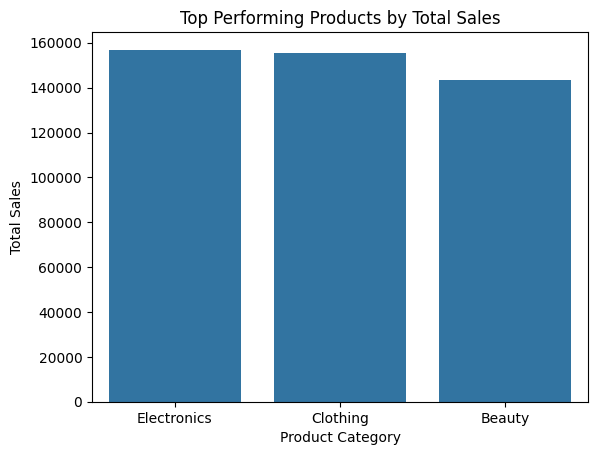

In [ ]:
sns.barplot(x='Product Category', y='Total Amount', data=top_products)
plt.title('Top Performing Products by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

seasonal trends

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'Date' with your column name
df['Month'] = df['Date'].dt.month


In [ ]:
monthly_sales = df.groupby(['Product Category', 'Month'])['Revenue'].sum().reset_index()


In [ ]:
df['Revenue'] = df['Quantity'] * df['Price per Unit']  # Use correct column names
monthly_sales = monthly_sales.sort_values(by = 'Month',ascending=False)
print(monthly_sales)


   Product Category  Month  Revenue
35      Electronics     12    20220
11           Beauty     12    12400
23         Clothing     12    12070
34      Electronics     11    10020
10           Beauty     11     9700
22         Clothing     11    15200
33      Electronics     10    17910
21         Clothing     10    13315
9            Beauty     10    15355
32      Electronics      9     7325
8            Beauty      9     6320
20         Clothing      9     9975
19         Clothing      8    12455
7            Beauty      8     9790
31      Electronics      8    14715
30      Electronics      7    11125
6            Beauty      7    16090
18         Clothing      7     8250
29      Electronics      6    15550
17         Clothing      6    10170
5            Beauty      6    10995
28      Electronics      5    23245
16         Clothing      5    17455
4            Beauty      5    12450
27      Electronics      4     8025
3            Beauty      4    11905
15         Clothing      4  

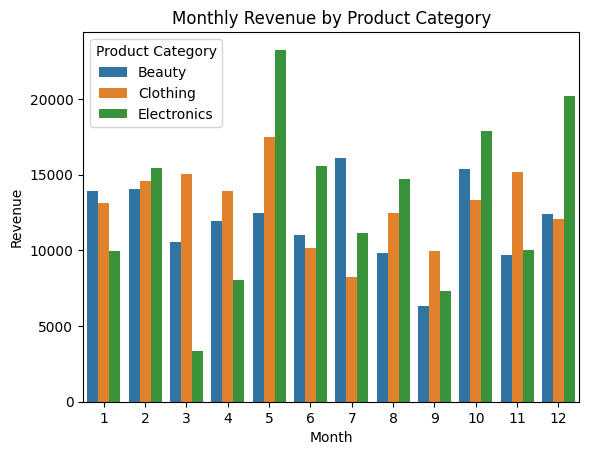

In [ ]:
sns.barplot(x='Month', y='Revenue', hue='Product Category', data=monthly_sales)
plt.title('Monthly Revenue by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

revenue patterns.

In [ ]:
df['Revenue'] = df['Quantity']*df['Price per Unit']

In [ ]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

In [ ]:
print(monthly_revenue)

    Month  Revenue
0       1    36980
1       2    44060
2       3    28990
3       4    33870
4       5    53150
5       6    36715
6       7    35465
7       8    36960
8       9    23620
9      10    46580
10     11    34920
11     12    44690


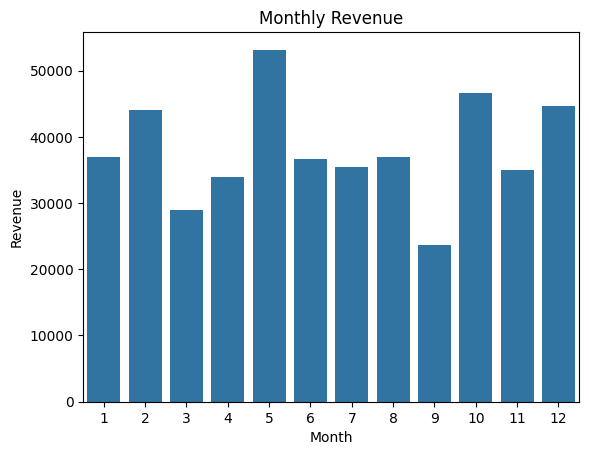

In [ ]:
sns.barplot(x='Month',y = 'Revenue',data = monthly_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()